In [38]:
import numpy as np # algèbre linéaire
import pandas as pd # traitement des données, I/O de fichier CSV (par ex. pd.read_csv)
import seaborn as sns # bibliothèque de tracé qui utilise matplot
import matplotlib.pyplot as plt # pour tracer certains paramètres dans seaborn
df = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv", dtype={
  'Gender':'category',
  'FCVC': 'category',
  'CAEC':'category',
  'CALC':'category',
  'MTRANS':'category',
  'NObeyesdad':'category',
})

df["family_history_with_overweight"] = df["family_history_with_overweight"].apply(lambda v: v == "yes")
df["FAVC"] = df["FAVC"].apply(lambda v: v == "yes")
df["SMOKE"] = df["SMOKE"].apply(lambda v: v == "yes")
df["SCC"] = df["SCC"].apply(lambda v: v == "yes")


df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,True,False,2,3.0,Sometimes,False,2.000000,False,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,True,False,3,3.0,Sometimes,True,3.000000,True,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,True,False,2,3.0,Sometimes,False,2.000000,False,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,False,False,3,3.0,Sometimes,False,2.000000,False,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,False,False,2,1.0,Sometimes,False,2.000000,False,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,True,True,3,3.0,Sometimes,False,1.728139,False,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,True,True,3,3.0,Sometimes,False,2.005130,False,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,True,True,3,3.0,Sometimes,False,2.054193,False,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,True,True,3,3.0,Sometimes,False,2.852339,False,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [39]:
df.describe()

,Age,Height,Weight,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,4.000000,3.000000,3.000000,2.000000


In [53]:
df2 = pd.DataFrame(df)
# discrétisation
n = len(df["Age"])
bins = int(np.ceil(np.log2(n) + 1))
df2["Age"] = pd.cut(df["Age"], bins)

print(df.dtypes)

0       (17.615, 21.231]
1       (17.615, 21.231]
2       (21.231, 24.846]
3       (24.846, 28.462]
4       (21.231, 24.846]
              ...       
2106    (17.615, 21.231]
2107    (21.231, 24.846]
2108    (21.231, 24.846]
2109    (21.231, 24.846]
2110    (21.231, 24.846]
Name: Age, Length: 2111, dtype: category
Categories (13, interval[float64, right]): [(13.953, 17.615] < (17.615, 21.231] < (21.231, 24.846] < (24.846, 28.462] ... (46.538, 50.154] < (50.154, 53.769] < (53.769, 57.385] < (57.385, 61.0]]


ValueError: Input array must be 1 dimensional

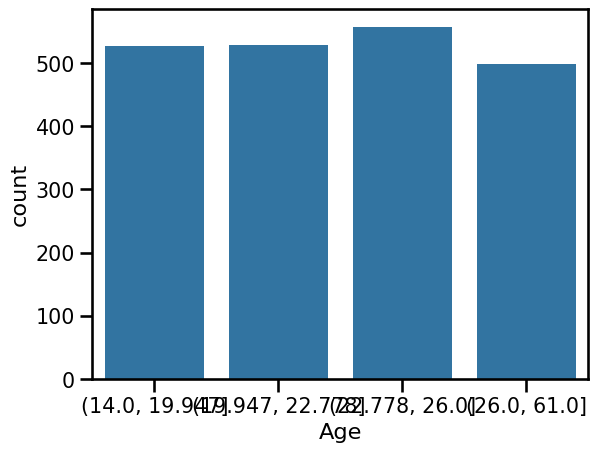

In [50]:
sns.countplot(data=df2, x='Age')
plt.show()